# Plot Map 
## Oct 2

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

meanSlewRate = 4.04 # deg/sec

In [416]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [457]:
import matplotlib.pyplot as plt

def plot_sphere_proj(df):
    """
    Plots sky brightness as a function of azimuth and elevation using 
    an azimuthal equidistant projection.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create figure and axes with polar projection
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    # Convert Azimuth to radians
    azimuth_rad = np.deg2rad(df['Az'])

    # Plot brightness as a scatter in polar coordinates (azimuth, altitude)
    sc = ax.scatter(azimuth_rad, df['Alt'], c=np.log10(np.abs(df['current_mean'])*6.28e18), cmap='plasma', s=500)

    # Customize plot
    plt.colorbar(sc, label=r'Sky Brightness $[log(e^- / sec)]$')
    ax.set_theta_zero_location('N')  # North at the top
    ax.set_theta_direction(-1)       # Clockwise direction
    ax.set_xlabel('Azimuth (Az)')
    ax.set_ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Polar Proj, Sky Brightness \n Sep 26 from {t0} to {tend}")
    
    # Show the plot
    plt.tight_layout()
    plt.savefig('polar_map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_sphere_proj(df)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_2d_surface(df):
    """
    Plots sky brightness as a 2D surface plot (Alt vs Az) using nearest interpolation.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create a grid for the interpolation
    grid_x, grid_y = np.mgrid[df['az_rank'].min():df['az_rank'].max():30j, 
                              df['alt_rank'].min():df['alt_rank'].max():30j]

    # Interpolate the data using nearest neighbor method
    grid_z = griddata((df['az_rank'], df['alt_rank']), np.log10(np.abs(df['current_mean'])*6.28e18), 
                      (grid_x, grid_y), method='nearest')

    # Create the figure and axis
    plt.figure(figsize=(8, 6))

    # Plot the interpolated surface
    plt.imshow(grid_z.T, extent=(8, -188, 82, 30),
               origin='lower', aspect='auto', cmap='plasma', interpolation='nearest')
    # Add labels and title
    plt.xlabel('Azimuth (Az)')
    plt.ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Sky Brightness \n Sep 26 from {t0} to {tend}")
    plt.plot(df['Az'], df['Alt'], 'kx', markersize=10)
    
    # Add colorbar for brightness levels
    plt.colorbar(label=r'Sky Brightness  $[e^- / sec]$')
    

    # Show the plot
    plt.tight_layout()
    plt.savefig('map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_2d_surface(df)


In [458]:
g_time1 = ['2024-10-02 19:53:00.431610','2024-10-02 19:58:50.952745']
g_time2 = ['2024-10-02 19:58:50.444668', '2024-10-02 20:04:50.151908']
g_time3 = ['2024-10-02 20:04:50.576699', '2024-10-02 20:09:30.891562']
g_time4 = ['2024-10-02 20:09:38.891562', '2024-10-02 20:12:17.079661']
g_time5 = ['2024-10-02 20:21:45.500881', '2024-10-02 20:34:24.430452']

def make_slice(df, timeCut):
    return df[(df['chilean_time'] > timeCut[0])&(df['chilean_time']<timeCut[1])&(df['flag']==False)].copy()


In [530]:
import pytz
import pandas as pd

date = '20241002'
fname = f'../DATA/{date[:-2]}/{date}.csv'

df = pd.read_csv(fname)
df = df.iloc[3:].copy()
# df['Az'] = np.where((df['Az']>150)&(df['alt_rank']==7), -1*df['Az'], df['Az'])
df['flux'] = np.abs(df['current_mean']*6.28e18)
# df = df[df['Az']<170].copy()
df  = df[df['flux']<1e18].copy()
df.reset_index(inplace=True)

df['logMean'] = np.log10(np.abs(df['current_mean']))
df.logMean.describe()


# Convert the string to a datetime object
df['timestamp'] = pd.to_datetime(df['date'], utc=True)

# Define the Chilean timezone
chile_tz = pytz.timezone('America/Santiago')

# Convert the UTC timestamp to Chilean local time
df['chilean_time'] = df['timestamp'].dt.tz_convert(chile_tz)

# Format the Chilean local time to 'HH:MM am/pm'
df['local_time'] = df['chilean_time'].dt.strftime('%I:%M %p')

df['elapsed_time'] = [(df['chilean_time'].iloc[i] - df['chilean_time'].iloc[0]).total_seconds() for i in range(len(df))]

In [531]:
!ls ../DATA/202410/2024100*

../DATA/202410/20241001.csv  ../DATA/202410/20241002.csv


In [532]:
g1 = make_slice(df, g_time1)
g2 = make_slice(df, g_time2)
g3 = make_slice(df, g_time3)

In [533]:
g1

,index,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,...,az_rank,electrometer_filename,flag,mount_filename,flux,logMean,timestamp,chilean_time,local_time,elapsed_time
0,3,20241002225319,2024-10-02 22:53:19.431610,4,NaN,0.930425,SDSSg,75.82732,0.00000,-1.692940e-07,...,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.063166e+12,-6.771358,2024-10-02 22:53:19.431610+00:00,2024-10-02 19:53:19.431610-03:00,07:53 PM,0.000000
1,4,20241002225323,2024-10-02 22:53:23.487329,5,NaN,0.929714,SDSSg,66.50634,0.00000,-1.829749e-07,...,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.149082e+12,-6.737608,2024-10-02 22:53:23.487329+00:00,2024-10-02 19:53:23.487329-03:00,07:53 PM,4.055719
2,5,20241002225327,2024-10-02 22:53:27.543780,6,NaN,0.929741,SDSSg,56.76315,0.00000,-2.136549e-07,...,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.341753e+12,-6.670287,2024-10-02 22:53:27.543780+00:00,2024-10-02 19:53:27.543780-03:00,07:53 PM,8.112170
3,6,20241002225331,2024-10-02 22:53:31.588381,7,NaN,0.930474,SDSSg,46.96971,0.00000,-2.652725e-07,...,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.665911e+12,-6.576308,2024-10-02 22:53:31.588381+00:00,2024-10-02 19:53:31.588381-03:00,07:53 PM,12.156771
4,7,20241002225335,2024-10-02 22:53:35.638894,8,NaN,0.929303,SDSSg,37.15829,0.00000,-3.429512e-07,...,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,2.153734e+12,-6.464768,2024-10-02 22:53:35.638894+00:00,2024-10-02 19:53:35.638894-03:00,07:53 PM,16.207284
6,9,20241002225403,2024-10-02 22:54:03.226472,10,NaN,0.929841,SDSSg,77.96788,-30.31065,-1.531516e-07,...,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,9.617920e+11,-6.814878,2024-10-02 22:54:03.226472+00:00,2024-10-02 19:54:03.226472-03:00,07:54 PM,43.794862
7,10,20241002225407,2024-10-02 22:54:07.277292,11,NaN,0.929424,SDSSg,68.06520,-30.31065,-1.748155e-07,...,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.097841e+12,-6.757420,2024-10-02 22:54:07.277292+00:00,2024-10-02 19:54:07.277292-03:00,07:54 PM,47.845682
8,11,20241002225411,2024-10-02 22:54:11.326450,12,NaN,0.929254,SDSSg,55.56078,-30.31065,-2.122042e-07,...,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.332642e+12,-6.673246,2024-10-02 22:54:11.326450+00:00,2024-10-02 19:54:11.326450-03:00,07:54 PM,51.894840
9,12,20241002225415,2024-10-02 22:54:15.371621,13,NaN,0.929326,SDSSg,45.90999,-30.31065,-2.834613e-07,...,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,1.780137e+12,-6.547506,2024-10-02 22:54:15.371621+00:00,2024-10-02 19:54:15.371621-03:00,07:54 PM,55.940011
10,13,20241002225419,2024-10-02 22:54:19.418361,14,NaN,0.929858,SDSSg,36.02591,-30.31065,-4.285677e-07,...,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,2.691405e+12,-6.367981,2024-10-02 22:54:19.418361+00:00,2024-10-02 19:54:19.418361-03:00,07:54 PM,59.986751


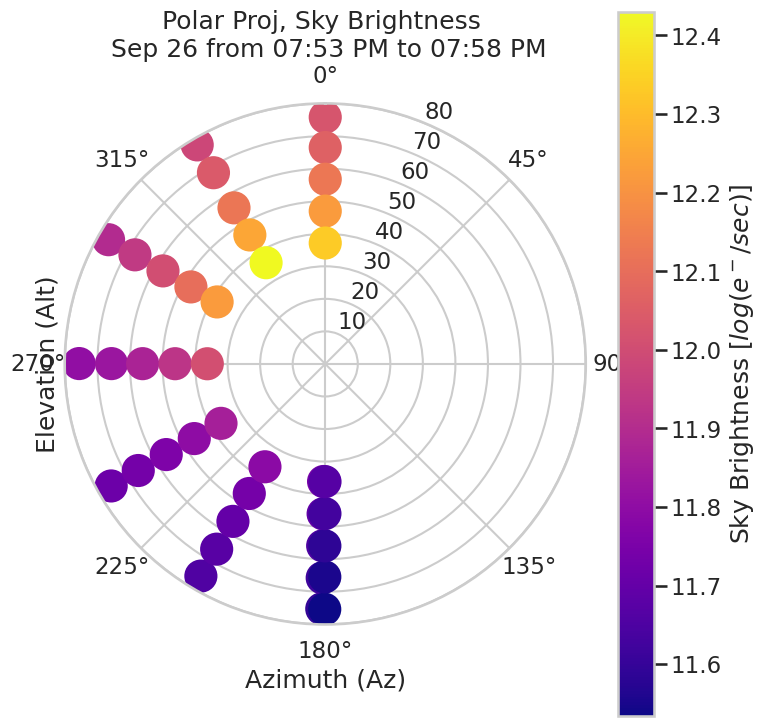

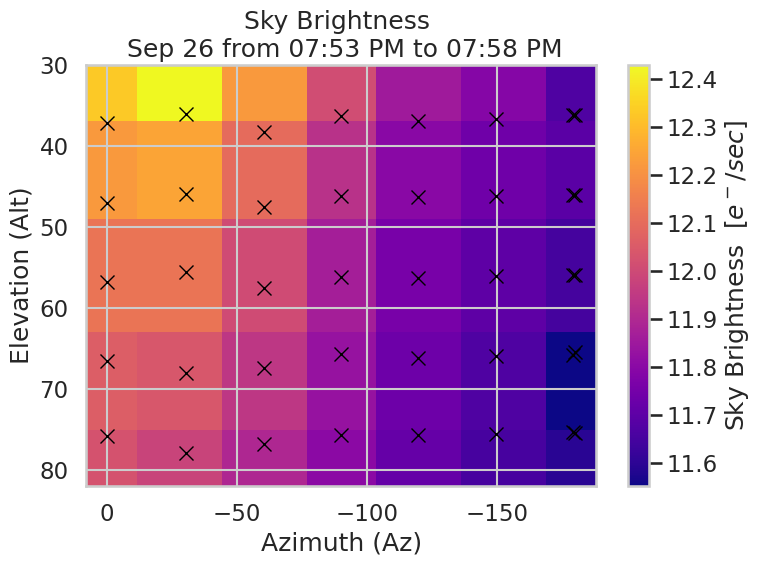

In [534]:
plot_sphere_proj(g1)
plot_2d_surface(g1)


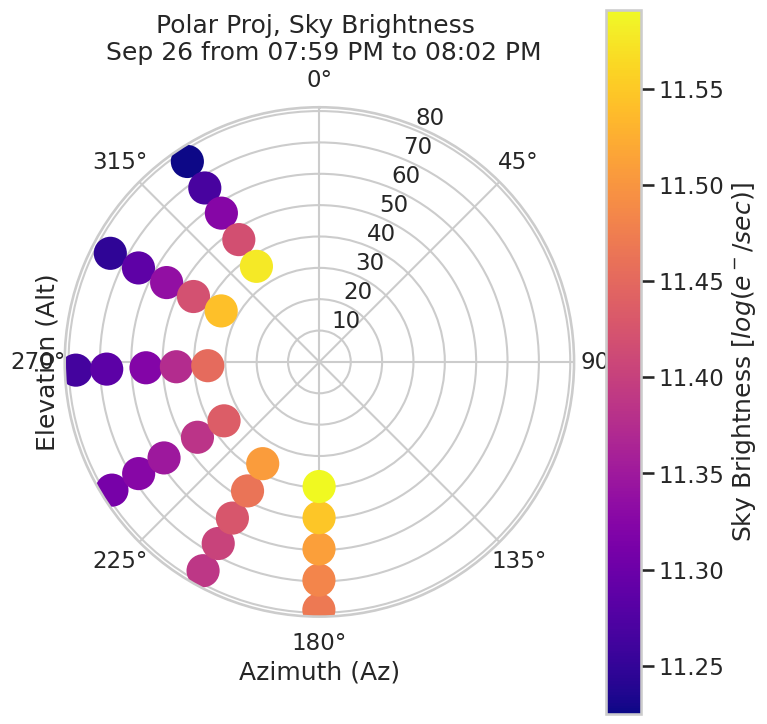

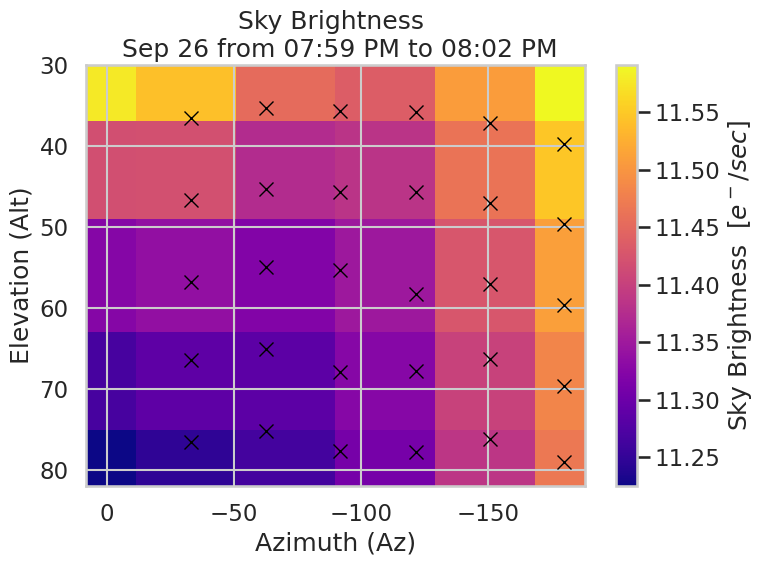

In [535]:
plot_sphere_proj(g2)
plot_2d_surface(g2)

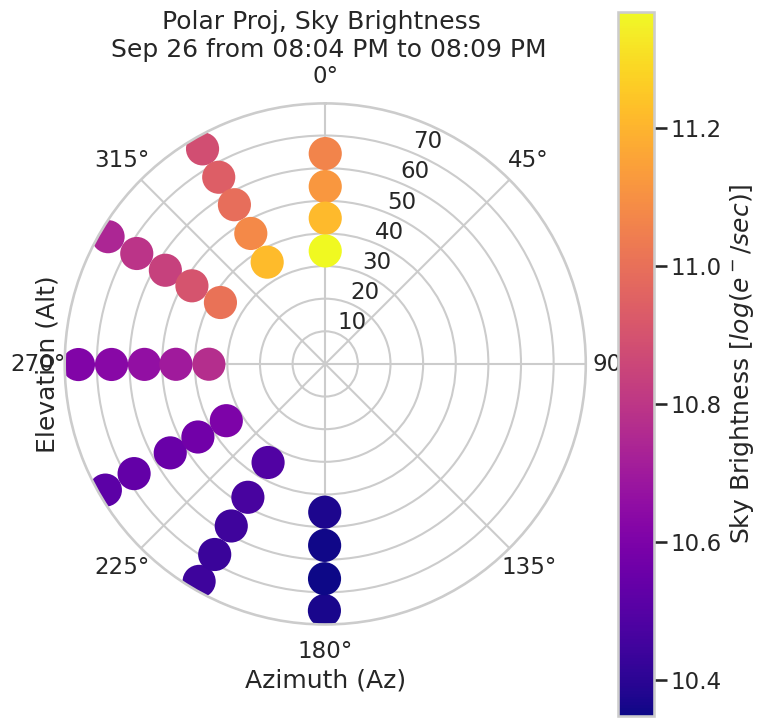

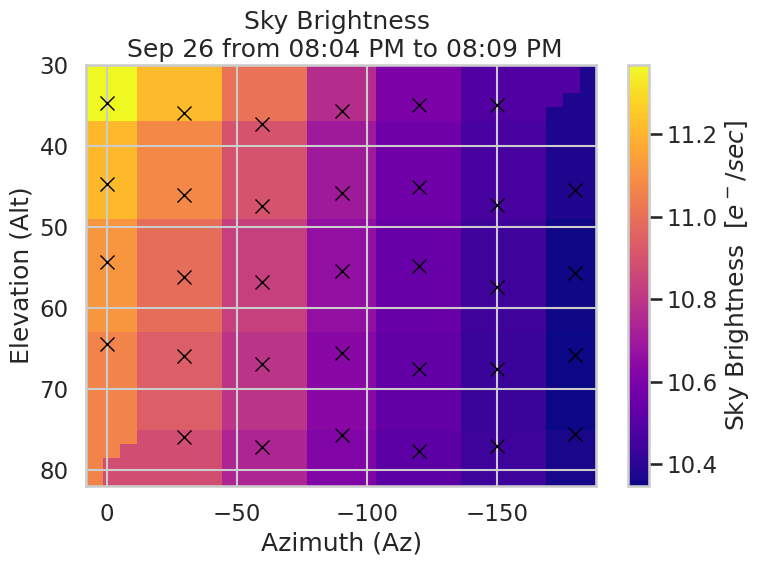

In [536]:
plot_sphere_proj(g3)
plot_2d_surface(g3)


## Elevation Gradient

In [537]:
# Time-Scale Initial Guess
t0 = g1.chilean_time.iloc[0] # timestamp


In [538]:
# # Model
# # A*exp(-(t-t0)/tau)
# f0 = 4.59e12 # electrons per sec
# pars = np.array([4.79380076, 0.98968839])
# fluxesExpected = f0*popt[1]*np.exp(-(times/popt[0]))


Text(0, 0.5, 'flux [$e^-/sec$]')

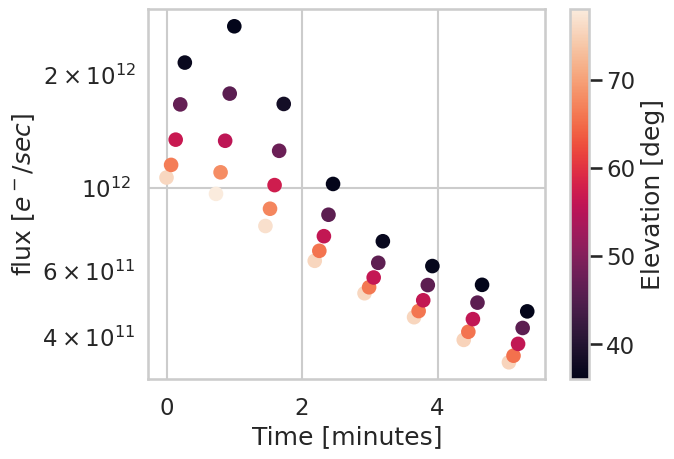

In [539]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Alt.to_numpy()

plt.yscale('log')
plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Elevation [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')

Text(0, 0.5, 'flux [$e^-/sec$]')

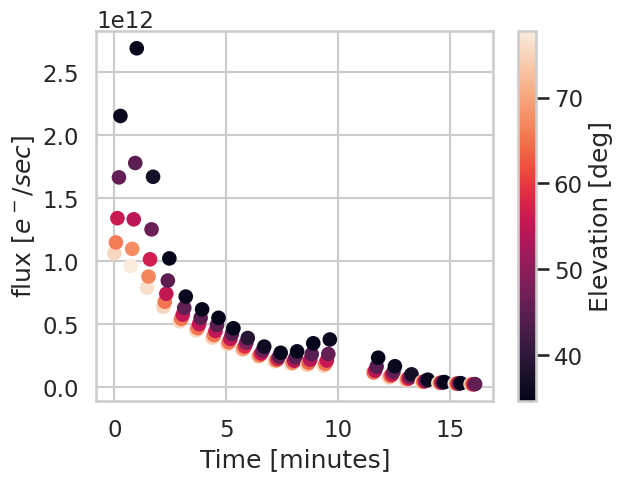

In [540]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Alt.to_numpy()

# plt.yscale('log')
plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g2['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g2))])/60
fluxes = np.array(np.abs(g2['current_mean'].to_numpy())*6.28e18)
el = g2.Alt.to_numpy()

plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g3['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g3))])/60
fluxes = np.array(np.abs(g3['current_mean'].to_numpy())*6.28e18)
el = g3.Alt.to_numpy()

plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Elevation [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')

Text(0, 0.5, 'flux [$e^-/sec$]')

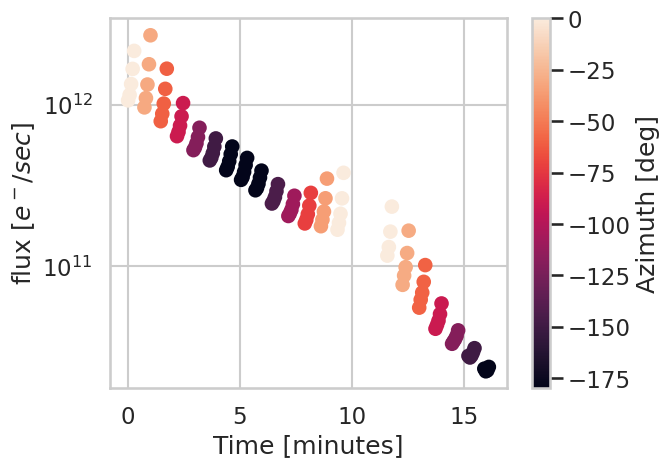

In [541]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Az.to_numpy()

plt.yscale('log')
plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g2['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g2))])/60
fluxes = np.array(np.abs(g2['current_mean'].to_numpy())*6.28e18)
el = g2.Az.to_numpy()

plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g3['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g3))])/60
fluxes = np.array(np.abs(g3['current_mean'].to_numpy())*6.28e18)
el = g3.Az.to_numpy()

plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Azimuth [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')


Text(0.5, 1.0, 'Twilight Monitor - SDSSg band \n Date 20241002')

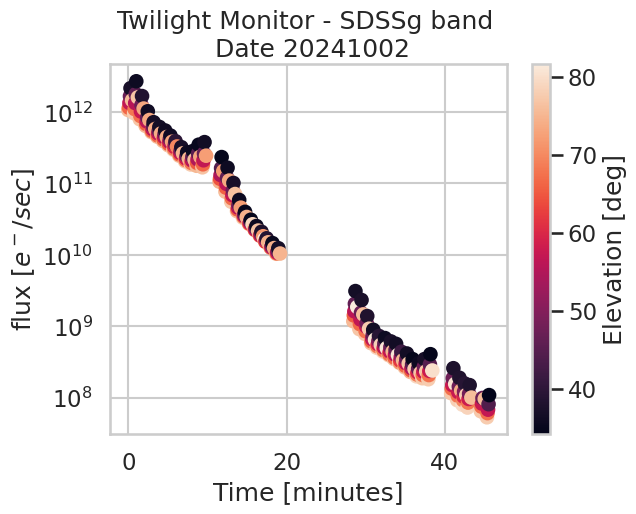

In [549]:
# time correction
times = df['elapsed_time']/60.
fluxes = np.array(np.abs(df['current_mean'].to_numpy())*6.28e18)
el = df.Alt.to_numpy()

plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Elevation [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')
plt.yscale('log')
plt.title(f"Twilight Monitor - SDSSg band \n Date {date}")

In [543]:
# Model
# A*exp(-(t-t0)/tau)
f0 = 4.59e12 # electrons per sec
pars = np.array([4.79380076, 0.98968839])
fluxesExpected = f0*popt[1]*np.exp(-(times/popt[0]))


## Time-Scale Analysis on Pointings

In [472]:
def mask_data(df, i, j):
    mask = (df['az_rank']==i)&(df['alt_rank']==j)
    return df[mask].copy()

In [511]:
AZ_STEPS = 8
EL_STEPS = 5

cols = ['chilean_time', 'elapsed_time', 'flux', 'Az','Alt','alt_rank','az_rank']
pixels = []

for i in range(AZ_STEPS-1):
    for j in range(EL_STEPS-1):
        pixels.append(mask_data(df, i+1, j+1)[cols])
        

In [525]:
j = 0
d = pixels[j*5]
d

,chilean_time,elapsed_time,flux,Az,Alt,alt_rank,az_rank
0,2024-10-02 19:53:19.431610-03:00,0.000000,1.063166e+12,0.0,75.82732,1,1
82,2024-10-02 20:04:50.576699-03:00,691.145089,1.054600e+11,0.0,74.59522,1,1
148,2024-10-02 20:21:45.500881-03:00,1706.069271,1.172175e+09,0.0,75.33871,1,1
232,2024-10-02 20:34:08.193319-03:00,2448.761709,1.150449e+08,0.0,77.06377,1,1
256,2024-10-02 20:37:53.199075-03:00,2673.767465,6.412534e+07,0.0,77.22608,1,1


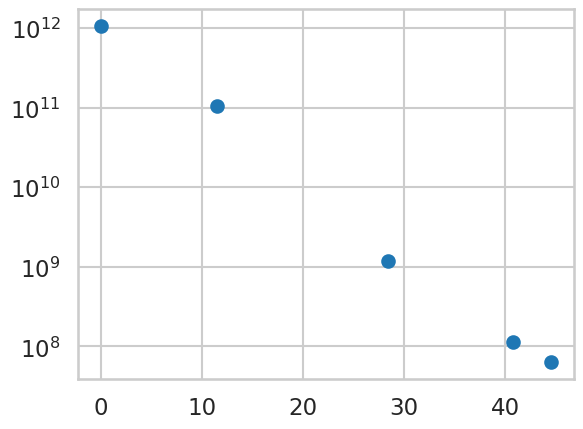

In [526]:
plt.scatter(d['elapsed_time']/60, d['flux']) 
plt.yscale('log')

## Analysis on Continous Exposures

In [476]:
continousSlew = df[(df['flag']==True)&(df['alt_rank']==0)]
continousSlew

,index,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,...,az_std,alt_rank,az_rank,electrometer_filename,flag,mount_filename,logMean,timestamp,chilean_time,local_time
5,8,20241002225347,2024-10-02 22:53:47.532425,9,10.478579,10.626472,SDSSg,75.64824,0.00000,-2.325365e-07,...,NaN,0,1,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.633509,2024-10-02 22:53:47.532425+00:00,2024-10-02 19:53:47.532425-03:00,07:53 PM
11,14,20241002225431,2024-10-02 22:54:31.412161,15,10.591739,10.729356,SDSSg,76.86867,-30.31065,-2.548728e-07,...,NaN,0,2,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.593677,2024-10-02 22:54:31.412161+00:00,2024-10-02 19:54:31.412161-03:00,07:54 PM
17,20,20241002225515,2024-10-02 22:55:15.267934,21,10.692497,10.836333,SDSSg,73.35634,-60.17514,-1.778364e-07,...,NaN,0,3,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.749979,2024-10-02 22:55:15.267934+00:00,2024-10-02 19:55:15.267934-03:00,07:55 PM
23,26,20241002225559,2024-10-02 22:55:59.074184,27,10.517404,10.722582,SDSSg,73.49586,-89.91430,-1.228393e-07,...,NaN,0,4,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.910663,2024-10-02 22:55:59.074184+00:00,2024-10-02 19:55:59.074184-03:00,07:55 PM
29,32,20241002225643,2024-10-02 22:56:43.271830,33,10.771400,10.930171,SDSSg,73.63964,-119.68739,-9.202320e-08,...,NaN,0,5,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.036103,2024-10-02 22:56:43.271830+00:00,2024-10-02 19:56:43.271830-03:00,07:56 PM
35,38,20241002225727,2024-10-02 22:57:27.214129,39,10.809234,11.032565,SDSSg,74.16119,-149.62210,-7.960108e-08,...,NaN,0,6,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.099081,2024-10-02 22:57:27.214129+00:00,2024-10-02 19:57:27.214129-03:00,07:57 PM
41,44,20241002225810,2024-10-02 22:58:10.971181,45,10.625360,10.828864,SDSSg,73.87408,-179.18934,-7.095365e-08,...,NaN,0,7,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.149025,2024-10-02 22:58:10.971181+00:00,2024-10-02 19:58:10.971181-03:00,07:58 PM
57,62,20241002230013,2024-10-02 23:00:13.904782,63,10.924010,11.128379,SDSSg,74.94981,-150.87715,-4.193251e-08,...,NaN,0,6,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.377449,2024-10-02 23:00:13.904782+00:00,2024-10-02 20:00:13.904782-03:00,08:00 PM
63,68,20241002230057,2024-10-02 23:00:57.910254,69,10.766582,10.941864,SDSSg,74.87487,-121.71299,-3.542170e-08,...,NaN,0,5,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.450731,2024-10-02 23:00:57.910254+00:00,2024-10-02 20:00:57.910254-03:00,08:00 PM
69,74,20241002230141,2024-10-02 23:01:41.863366,75,10.781769,10.930280,SDSSg,75.91103,-91.93372,-3.406317e-08,...,NaN,0,4,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-7.467715,2024-10-02 23:01:41.863366+00:00,2024-10-02 20:01:41.863366-03:00,08:01 PM


In [477]:
eFiles = [continousSlew.electrometer_filename.iloc[i] for i in range(len(continousSlew))]
eAzs = [continousSlew.Az.iloc[i] for i in range(len(continousSlew))]
eDatas = []
for efile in eFiles:
    eDatas.append(np.load(efile))

In [478]:
def convert_time_to_angle(data, az0, azend):
    time = data['time']
    angle = az0+data['time']*meanSlewRate
    return angle

def plot_eFile(data,az=0,ax=None, is_label=True):
    if ax is None: ax = plt.gca()
    elec = 6.28e18*np.abs(data['CURR'])
    ax.plot(data['time'],elec)
    if is_label:
        ax.set_ylabel('Flux $[e^-/sec]$')
        ax.set_xlabel('Time [seconds]')

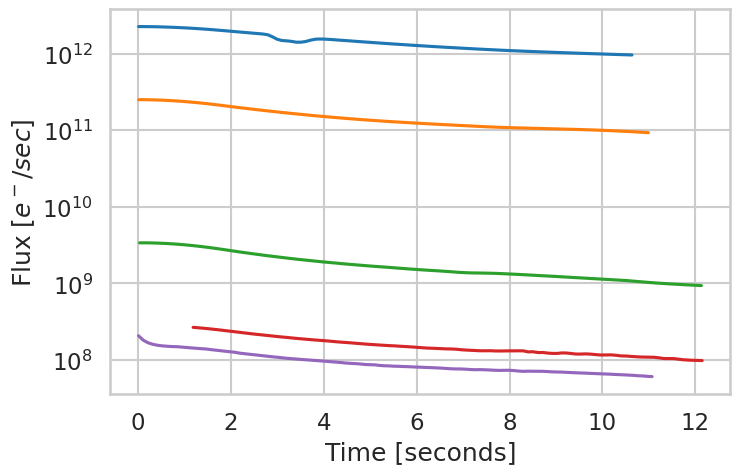

In [479]:
fig, axs = plt.subplots(1,1,figsize=(8,5))
for i in range(len(eDatas)):
    if np.abs(eAzs[i])<10:
        plot_eFile(eDatas[i],ax=axs)
axs.set_yscale('log')

### Rough Convertion to Angle

In [480]:
def convert_time_to_angle(data, az0, azend):
    time = data['time']
    angle = az0+data['time']*meanSlewRate
    return angle

# continousSlew.index
eAltStart = [df.Alt.iloc[i-1] for i in continousSlew.index]
eAltEnd = [df.Alt.iloc[i] for i in continousSlew.index]
eDates = [df.chilean_time.iloc[i] for i in continousSlew.index]
continous = []
for edata, el0, ele, az, d in zip(eDatas,eAltStart, eAltEnd, eAzs, eDates):
    out = dict().fromkeys(['angle','time','flux','az'])
#     if az<=-45:
    angle = convert_time_to_angle(edata, el0, ele)
    out['angle'] = angle
    out['time'] = edata['time']
    out['flux'] = np.abs(edata['CURR'])*6.28e18
    out['az'] = az
    out['date'] = d
    continous.append(out)


In [481]:
def plot_continous_slew(data, az=0, ax=None, is_label=True):
    if ax is None:
        ax = plt.gca()
    
    # Calculate flux (electrons per second) from current
    elec = data['flux']
    
    t0 = data['date'].strftime('%I:%M %p')
    # Plot flux vs time on the bottom axis
    ax.plot(data['angle'], elec, label=f'{t0}')
    
    if is_label:
        ax.set_ylabel('Flux $[e^-/sec]$')
        ax.set_xlabel('Angle [deg]')

    # Return the axis objects in case further customization is needed
    return ax

(100000000.0, 10000000000000.0)

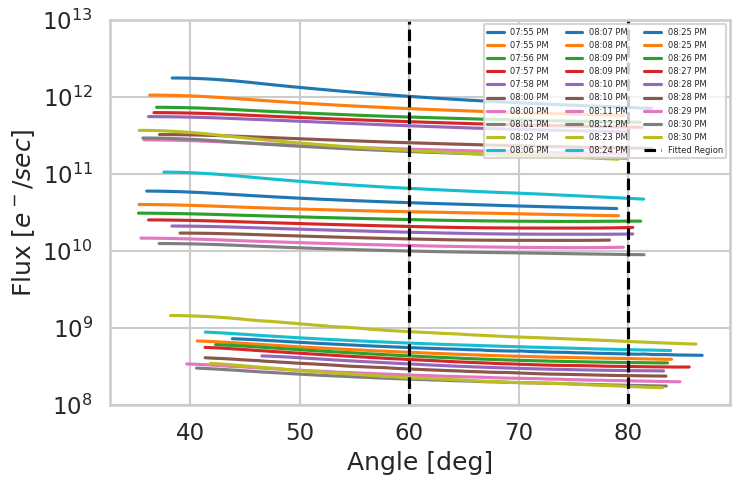

In [482]:
aLow, aEnd = 60, 80

fig, axs = plt.subplots(1,1,figsize=(8,5))
for i in range(len(continous)):
    if np.abs(continous[i]['az'])>50:
        plot_continous_slew(continous[i], ax=axs)
axs.set_yscale('log')
axs.axvline(aLow, color='k', linestyle='--', label='Fitted Region')
axs.axvline(aEnd, color='k', linestyle='--')
axs.legend(ncols=3,fontsize=6)
axs.set_ylim(1e8, 1e13)

In [483]:
angleVec = np.linspace(aLow, aEnd, 40)
def interFlux(data):
    return np.interp(angleVec, data['angle'], data['flux'])

# prepare data
x = np.array([(continous[i]['date']-continous[0]['date']).total_seconds() for i in range(len(continous)-1)])
y = np.array([np.mean(interFlux(continous[i])/interFlux(continous[0])) for i in range(len(continous)-1)])
yErr = np.array([np.std(interFlux(continous[i])/interFlux(continous[0])) for i in range(len(continous)-1)])

In [484]:
from scipy.optimize import curve_fit
# Define the exponential decay function
def exp_decay(t, tau, a):
    return a*np.exp(-t / tau)

# Perform the fit with curve_fit, using fluxErr as the weights
p0, _ = curve_fit(exp_decay, x/60, y)

popt, pcov = curve_fit(exp_decay, x/60, y, p0=p0, sigma=yErr)

# Extract the best-fit value of tau and its uncertainty
tau_fit = popt[0]
tau_err = np.sqrt(np.diag(pcov))[0]
np.sqrt(np.diag(_))[0]

/home/estevesjh/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/home/estevesjh/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.10573906232782602

Fitted tau: 4.1407 ± inf seconds


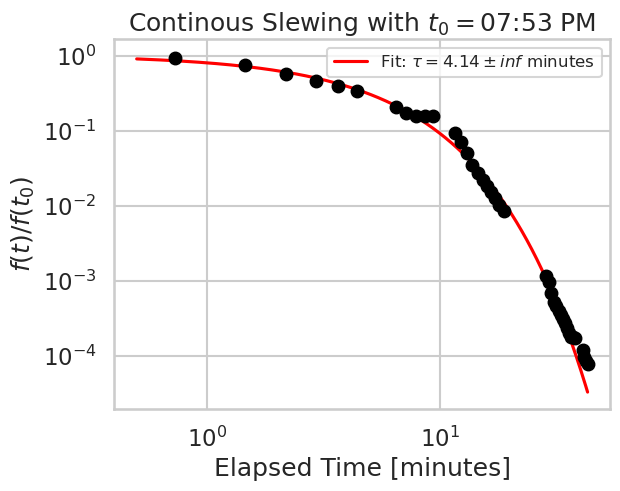

In [485]:
time_fit = np.linspace(0.5, max(x/60), 1000)
flux_fit = exp_decay(time_fit, *popt)

t0 = continous[0]['date'].strftime('%I:%M %p')
plt.errorbar(x/60, y, yerr=yErr, color='k', fmt='o')
plt.plot(time_fit, flux_fit, label=f'Fit: $\\tau = {tau_fit:.2f} \pm {tau_err:.2f}$ minutes', color='red')
plt.legend(fontsize=12)
plt.loglog()
plt.ylabel(r'$f(t)/f(t_0)$')
plt.xlabel('Elapsed Time [minutes]')
plt.title(f"Continous Slewing with $t_0=${t0}")
print(f"Fitted tau: {tau_fit:.4f} ± {tau_err:.4f} seconds")

## Mount Information

In [486]:
d = np.load('/home/estevesjh/Documents/twilightMonitor/DATA/mount/202410/mount_pointing_20241001_6.npz')
d['slew_angle']

array([76.86364, 88.93654, 80.70189, 70.22856, 61.13721, 50.97524,
       41.71776])

In [210]:
import glob
mFiles = glob.glob('/home/estevesjh/Documents/twilightMonitor/DATA/mount/202410/mount_pointing_20241001*')

mountDatas = []
for mfile in mFiles:
    d = np.load(mfile)
    mountDatas.append(d)

In [211]:
mountSlewRate = []
for mdata in mountDatas:
    mountSlewRate.append(mdata['slew_rate'])
mountSlewRate = np.array(mountSlewRate)

In [235]:
meanSlewRate = np.abs(np.median(mountSlewRate))
print(f"The mean slew rate is {meanSlewRate:0.2f} deg/sec")

The mean slew rate is 4.04 deg/sec


In [213]:
popt

array([3.78313454, 0.91253036])